PYMCDM

Biblioteka pymcdm(1.3.1) ułatwia tworzenie kodu dokonującego wielokryterialną analizę danych. 
Główne funkcjonalności to zbiór metod odpowiadający popularnym metodom MCDA, takim jak TOPSIS, SPOTIS, ARAS itp.
Biblioteka pozwala tez na wykorzystywanie funkcji obliczające wagi kryteriów, liczenie wskaźników korelacji, wspomaga normalizacje czy ma wbudowane metody do wizulazacji wyników i inne. 

TEST

W teście zostały wykorzystane 3 kryteria oraz 5 alternatyw, gdzie wszystkie dane są czysto przykładowe.
Wykorzystane metody to SPOTIS, TOPSIS oraz COPRAS. Początkowy test zakładał wykorzystanie tylko SPOTIS i TOPSIS, gdzie najpierw powstały rankingi dla obu metod, a następnie zostały one porównane przy pomocy 3 przykładowych wskaźników, równiez dostępnych w bibliotece.

In [92]:
from pymcdm.methods import SPOTIS, TOPSIS, COPRAS
from pymcdm.correlations import rw, pearson ,kendall_tau 
import numpy as np
from pymcdm.visuals import rankings_flow_correlation
import matplotlib.pyplot as plt

#macierz decyzyjna
data = np.array([
    [400, 7, 4],  # alt1
    [300, 8, 3],  # alt2
    [600, 5, 5],  # alt3
    [350, 6, 4],  # alt4
    [450, 7, 3]   # alt5
])  

bounds = np.array([[0, 1000], [1, 10], [1, 5]]) #granice kryteriów
weights = np.array([0.3, 0.4, 0.3]) #kryteriów
types = np.array([-1, 1, 1]) #typy kryteriów (koszt, zysk, zysk)

body_spotis = SPOTIS(bounds) #inicjacja metody spotis
pref_spotis = body_spotis(data, weights, types) #wprowadzenie do metody danych, wag, typów
ranking_spotis = body_spotis.rank(pref_spotis) #stworzenie rankingu
print(ranking_spotis)

body_topsis = TOPSIS()
pref_topsis = body_topsis(data, weights, types)
ranking_topsis = body_topsis.rank(-pref_topsis) # odwrócenie rankingu - wymagane dla TOPSIS
print(ranking_topsis)

def compare_rankings(r1, r2, decimals = 3): #przykładowe parametry korelacji
    return {
        "RW": round(float(rw(r1, r2)), decimals),
        "Pearson": round(float(pearson(r1, r2)), decimals),
        "Kendall": round(float(kendall_tau(r1, r2)), decimals)
    }
correlations_results = compare_rankings(ranking_spotis, ranking_topsis)
print(correlations_results)

[1. 2. 4. 3. 5.]
[4. 5. 1. 3. 2.]
{'RW': -0.8, 'Pearson': -0.8, 'Kendall': -0.6}


Biblioteka zawiera równiez funkcje pozwalającą na wizualizacje wyników. W tym celu wykorzystana została 3 metoda COPRAS. 

[4. 2. 5. 1. 3.]


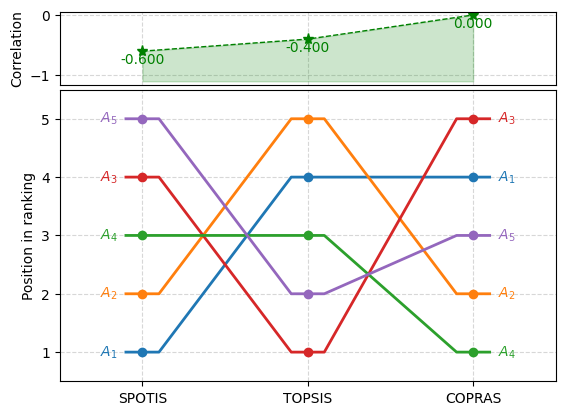

In [93]:
body_copras = COPRAS()
pref_copras = body_copras(data, weights, types)
ranking_copras = body_copras.rank(-pref_copras)
print(ranking_copras)
rankings = np.array([
    ranking_spotis,
    ranking_topsis,
    ranking_copras
])
correlations2  = [ #korelacje miedzy konkretnymi rankingami
    kendall_tau(ranking_spotis, ranking_topsis), 
    kendall_tau(ranking_topsis, ranking_copras),
    kendall_tau(ranking_spotis, ranking_copras)
]
labels = ["SPOTIS", "TOPSIS", "COPRAS"]
rankings_flow_correlation(rankings, correlations2, labels = labels) #wizulizacja
plt.show()